### Importação das bibliotecas usadas

In [71]:
import pandas as pd  # importar biblioteca para manipular dados em formato de tabelas
import matplotlib.pyplot as plt  # plotar graficos
import seaborn as sns  # plotar graficos
import numpy as np  # Usado para operações matemáticas e manipulação de arrays numéricos.

estado: UF do caso registrado. 

ano: Ano do caso registrado. 

CIRCOBITO: circunstância do óbito. 1 : Acidente, 2 : Suicídio, 3 : Homicídio, 4 : Outro, 0;5;6;7;8;9 : NA.

DTOBITO: dados do óbito.

DTNASC: data de nascimento.

SEXO: sexo. 1: Masculino, 2: Feminino, 0;9: NA.

RACACOR: raça. 1: Branca, 2: Preta, 3: Amarela, 4: Parda, 5: Indígena, 0;6;7;8;9: NA.

ESTCIV: estado civil. 1: Solteiro, 2: Casado, 3: Viúvo, 4: Separado judicialmente, 5: União consensual, 0;6;7;8;9: NA.

ESC: escolaridade. 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos, 0;6;7;9;A : NA .

OCUP: ocupação. Para óbitos a partir de 2006, segue-se a tabela CBO2002.

CODMUNRES: município de residência do falecido (codificado).

LOCOCOR: Local de ocorrência do óbito. 1: Hospital, 2: Outro estabelecimento de saúde, 3: Domicílio, 4: Via pública, 5: Outros, 9: NA.

ASSISTMED: Assistência médica. 1: Sim, 2: Não, 9: NA.

CAUSABAS: Causa básica do óbito. Código CID-10.

CAUSABAS_O: Causa básica do óbito. Código CID-10.

### Leitura da base

In [72]:
# Opção 1: Carregar a base de dados online
# Usamos o método pd.read_csv() diretamente com o link do GitHub, onde a base está hospedada.
# O parâmetro 'encoding="latin1"' é usado porque os dados possuem caracteres especiais no português (como acentos).
bd = pd.read_csv(
    'https://github.com/ProfAndersonVanin/analisa_ai/raw/refs/heads/main/datasus_suicidio.csv',
    encoding='latin1'
)
# Exibindo linhas da base 
bd

# Opção 2: Carregar a base de dados localmente
# Se você baixou o arquivo 'datasus_suicidio.csv' e o salvou na mesma pasta do seu script, use esta abordagem.
# informe o nome do arquivo como argumento no pd.read_csv().
# O mesmo parâmetro 'encoding="latin1"' é usado para evitar problemas com caracteres.

# bd = pd.read_csv('datasus_suicidio.csv', encoding='latin1')

# # Exibindo linhas da base 
# bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [73]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      58634 non-null  object 
 1   ano         58634 non-null  int64  
 2   CIRCOBITO   56606 non-null  object 
 3   DTOBITO     58634 non-null  object 
 4   DTNASC      58407 non-null  object 
 5   SEXO        58619 non-null  object 
 6   RACACOR     57298 non-null  object 
 7   ESTCIV      54305 non-null  object 
 8   ESC         45162 non-null  object 
 9   OCUP        58634 non-null  object 
 10  CODMUNRES   58634 non-null  object 
 11  LOCOCOR     58463 non-null  object 
 12  ASSISTMED   40872 non-null  object 
 13  CAUSABAS    58634 non-null  object 
 14  CAUSABAS_O  58544 non-null  object 
 15  idade       58407 non-null  float64
 16  mes         58634 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.6+ MB


Colunas que precisam de **atenção**



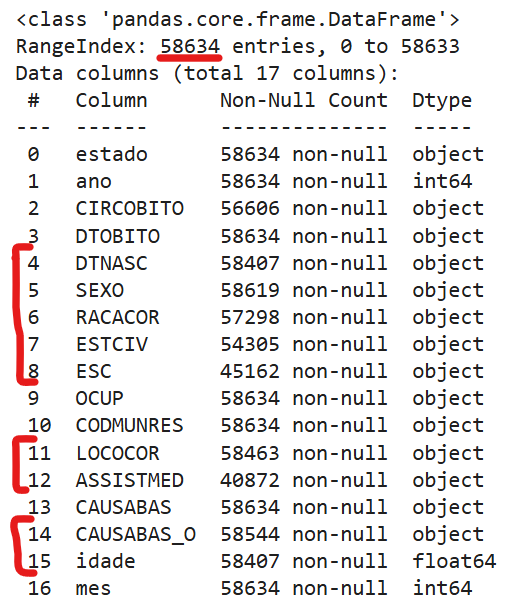

**TOTAL DE REGISTROS ==> 58634**

- QUANTIDADE DE DADOS NULOS

- CIRCOBTIDO ==> 56606 (3,46%) = 2028
- DTNASC ==> 58407 (0,38%) = 227
- SEXO ==> 58619 (0,026%) = 15
- RACACOR ==> 57298 (2,28%) = 1336
- ESTCIV ==> 54305 (**7,38%**) = 4329
- ESC ==> 45162 (**22,98%**) = 13472
- LOCOCOR ==> 58463 (0,29%) = 171
- ASSISTMED ==> 40872 (**30,29%**) = 17762
- CAUSABAS_O ==> 58544 (0,15%) = 90
- idade ==> 58407 (0,39%) = 227

Colunas que requerem maior atenção são: **ESTCIV**, **ESC** e **ASSISTMED**

As demais colunas como possuem uma porcentagem menor que 5% do total de dados, nestas os registros serão excluídos.

> **Obs.: Isso não é uma regra, foi uma opção minha com base na quantidade de valores nulos!**

In [74]:
bd.isnull().sum()

estado            0
ano               0
CIRCOBITO      2028
DTOBITO           0
DTNASC          227
SEXO             15
RACACOR        1336
ESTCIV         4329
ESC           13472
OCUP              0
CODMUNRES         0
LOCOCOR         171
ASSISTMED     17762
CAUSABAS          0
CAUSABAS_O       90
idade           227
mes               0
dtype: int64

In [75]:
# Remover registros com valores nulos apenas nas colunas 'Nome' e 'Idade'
bd2 = bd.dropna(subset=['CIRCOBITO', 'DTNASC', 'SEXO', 'RACACOR', 'LOCOCOR','CAUSABAS_O','idade'])
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [76]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      51448 non-null  object 
 8   ESC         42726 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   38937 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [77]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV         3522
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESTCIV**

Temos a seguinte informação a respeito desta coluna:

- **ESTCIV**: 1: Solteiro, 2: Casado, 3: Viúvo, 4: Separado judicialmente, 5: União consensual, 0;6;7;8;9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [78]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', nan, 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [79]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESTCIV'] = bd2['ESTCIV'].fillna('Não Informado')

In [80]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', 'Não Informado', 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [81]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESC**

Temos a seguinte informação a respeito desta coluna:

- **ESC**: 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos, 0;6;7;9;A : NA .

Vamos analisar a ocorrência individual de valores nesta coluna:

In [82]:
bd2['ESC'].unique()

array(['4 a 7 anos', '12 e mais', nan, '8 a 11 anos', '1 a 3 anos',
       'Nenhuma'], dtype=object)

In [83]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESC'] = bd2['ESC'].fillna('Não Informado')

In [84]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC               0
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ASSISTMED**

Temos a seguinte informação a respeito desta coluna:

Assistência médica

- **ASSISTMED**: 1: Sim, 2: Não, 9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [85]:
bd2['ASSISTMED'].unique()

array(['Não', nan, 'Sim'], dtype=object)

In [86]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ASSISTMED'] = bd2['ASSISTMED'].fillna('Não Informado')

In [87]:
bd2.isnull().sum()

estado        0
ano           0
CIRCOBITO     0
DTOBITO       0
DTNASC        0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
CODMUNRES     0
LOCOCOR       0
ASSISTMED     0
CAUSABAS      0
CAUSABAS_O    0
idade         0
mes           0
dtype: int64

**NESTE PONTO NÃO TEMOS MAIS DADOS NULOS OU FALTANTES.**

A base inicial possuia `58634` registros e agora estamos com `54970`.

Na etapa de remoção de dados nulos removemos `6,25%` do total de registros.

In [88]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      54970 non-null  object 
 8   ESC         54970 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   54970 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [89]:
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


Veja que temos as colunas: `DTOBITO`, `DTNASC` e `idade`. Há outra coluna chamado `ano`.

Vamos manter a coluna `ano` e `idade`. As outras duas não são necessárias.

Outro tipo de tratamento que pode ser feito é converter o valor da coluna `idade` para inteiro.

In [90]:
# Remover colunas 'Cidade' e 'Estado'
bd3 = bd2.drop(columns=['DTOBITO', 'DTNASC'])

In [91]:
bd3

,estado,ano,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [92]:
# Converter valores da coluna 'Idade' para inteiro
bd3['idade'] = bd3['idade'].astype(int)

In [93]:
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estado      54970 non-null  object
 1   ano         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  idade       54970 non-null  int32 
 14  mes         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


Renomeando as colunas para ficarem no mesmo formato

In [ ]:
# Renomear colunas
bd3 = bd3.rename(columns={'estado': 'ESTADO', 'ano': 'ANO','idade':'IDADE','mes':'MES'})
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESTADO      54970 non-null  object
 1   ANO         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  IDADE       54970 non-null  int32 
 14  MES         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


In [96]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7


Vejam que na coluna OCUP aparecem alguns valores estranhos:

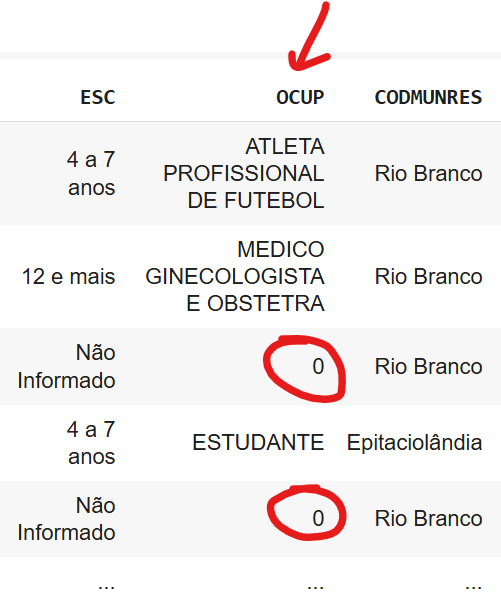

- Tratar esses valores....

- Verificar valores unicos em todas as colunas e ver se encontram mais alguma assim...

...

#### Na coluna `OCUP` temos o valor `0` se refere as pessoas que estão desempregadas no momento.

In [97]:
bd3['OCUP'].unique()

array(['ATLETA PROFISSIONAL DE FUTEBOL',
       'MEDICO GINECOLOGISTA E OBSTETRA', '0', ..., 'CATADOR DE MARISCOS',
       'SUBTENENTE BOMBEIRO MILITAR',
       'GERENTE DE PESQUISA E DESENVOLVIMENTO (P&D)'], dtype=object)

Vamos substituir os valores `0` da coluna `OCUP` por `DESEMPREGADO`

In [98]:
bd3.loc[bd3['OCUP'] == '0', 'OCUP'] = 'DESEMPREGADO'

In [99]:
bd3[bd3['OCUP'] == 'DESEMPREGADO']

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
5,AC,2014,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,51,2
6,AC,2014,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Senador Guiomard,Outros,Não,X700,X700,25,2
8,AC,2014,Suicídio,Masculino,Branca,Casado,12 e mais,DESEMPREGADO,Cruzeiro do Sul,Domicílio,Não,X702,X702,39,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58606,TO,2018,Suicídio,Masculino,Parda,Separado judicialmente,4 a 7 anos,DESEMPREGADO,Tocantinópolis,Domicílio,Não,X700,X700,31,9
58612,TO,2018,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Araguatins,Domicílio,Não Informado,X700,X700,54,11
58615,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Wanderlândia,Outros,Não Informado,X701,X701,26,12
58617,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Nova Olinda,Via pública,Não,X824,X824,29,12


##### Na coluna `LOCOCOR` temos o dado anormal `6`, que não temos muita informação sobre o que ele possa ser em nossa base, e ter poucos registros(6 linhas), irei colocar esses dados na categoria `Outros`

> LOCOCOR :  Local de ocorrência do óbito

In [100]:
bd3['LOCOCOR'].unique()

array(['Domicílio', 'Outros', 'Hospital', 'Via pública',
       'Outro estabelecimento de saúde', '6'], dtype=object)

In [101]:
bd3[bd3['LOCOCOR'] == '6']

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
10920,AM,2015,Suicídio,Masculino,Indígena,União consensual,Não Informado,PRODUTOR AGRICOLA POLIVALENTE,Jutaí,6,Sim,X689,X689,24,6
22102,AM,2016,Suicídio,Feminino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Tabatinga,6,Não,X709,X709,13,1
22104,AM,2016,Suicídio,Feminino,Indígena,União consensual,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Benjamin Constant,6,Não,X709,X709,18,3
22106,AM,2016,Suicídio,Feminino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Benjamin Constant,6,Não,X709,X709,17,4
22287,AM,2016,Suicídio,Masculino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,Tabatinga,6,Não,X709,X709,17,4
22289,AM,2016,Suicídio,Masculino,Indígena,Solteiro,8 a 11 anos,PRODUTOR AGRICOLA POLIVALENTE,São Paulo de Olivença,6,Não,X709,X709,29,7


In [102]:
# Substituir os valores '6' da coluna 'LOCOCOR' por 'Outros'
bd3.loc[bd3['LOCOCOR'] == '6', 'LOCOCOR'] = 'Outros'

##### Agora temos nossa base limpa, sem valores nulos, podemos começar nossa analise.

In [103]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7


### Nesta base, há outras causas de morte, mas a predominante é o suicídio

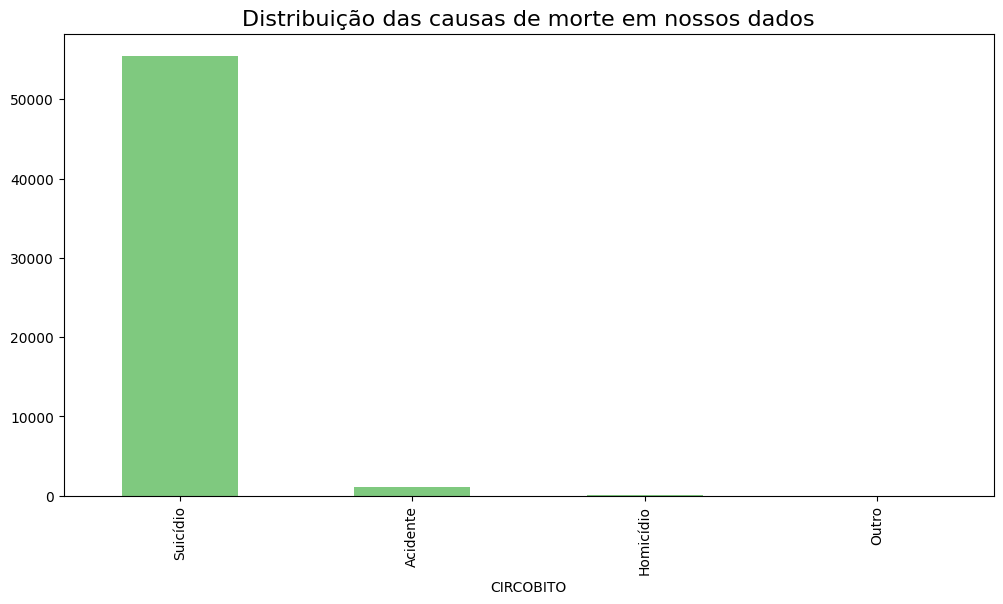

In [104]:
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))
bd['CIRCOBITO'].value_counts().plot.bar()
plt.title('Distribuição das causas de morte em nossos dados', fontsize=16)

plt.show()

### O Estado das pessoas impactam na saude mental da pessoa? / Qual é a distribuição de óbitos por estado ao longo dos anos?

##### São Paulo e o estado que aparece com mais registros

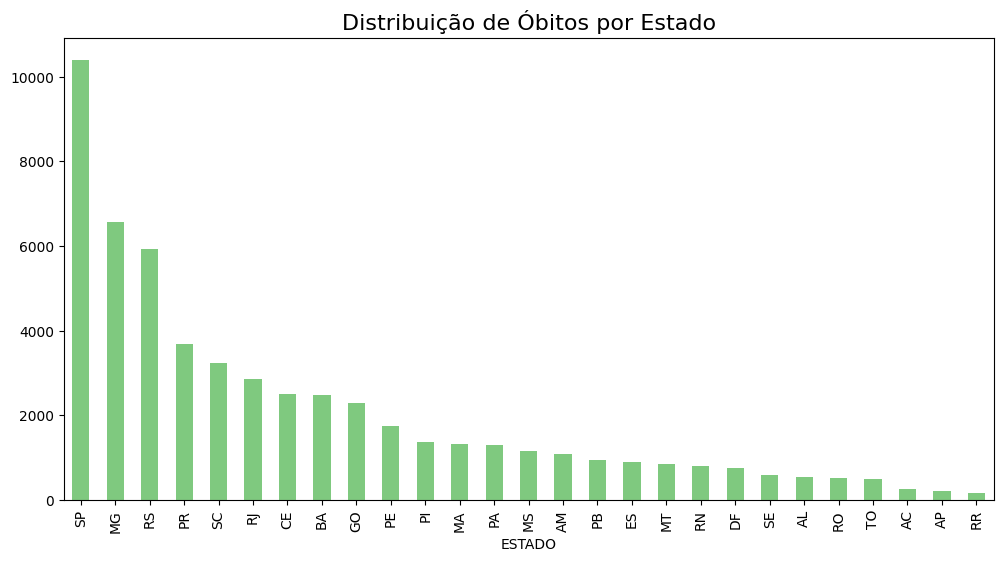

In [105]:
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))

bd3['ESTADO'].value_counts().plot.bar()
plt.title('Distribuição de Óbitos por Estado', fontsize=16)

plt.show()

Em 2016, no ranking de mortalidade por causas externas do Estado de São Paulo, suicídio aparece em terceiro lugar, atrás de acidentes de transporte e agressões

Porém, esses dados não indicam claramente os locais onde a maior parte das pessoas falece. Por isso, normalizamos as informações com base na população de cada estado.

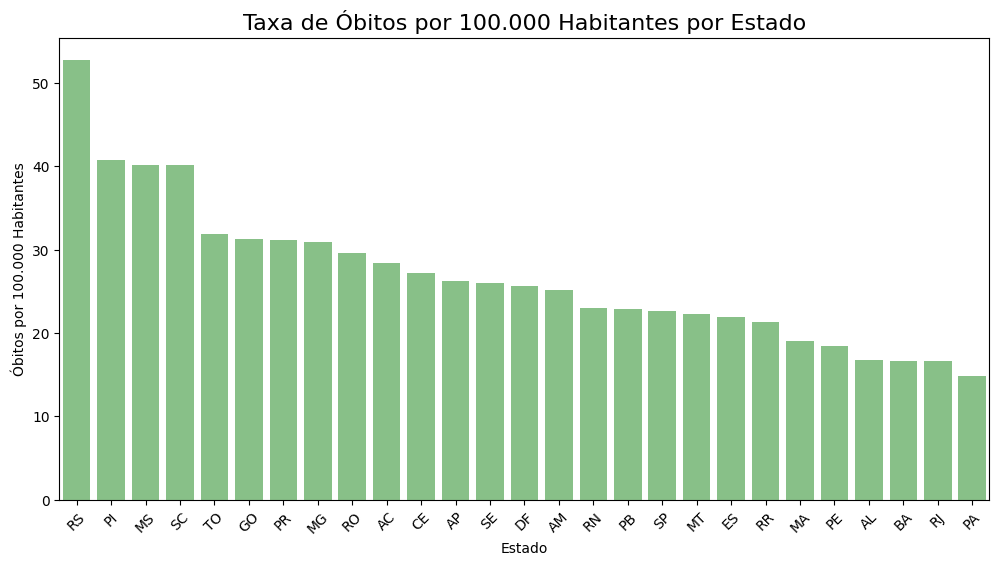

In [ ]:
# Dicionário com as populações
populacao_estados = {
    "SP": 45973190, "MG": 21322692, "RJ": 17219679, "BA": 14850513,
    "PR": 11824665, "RS": 11229915, "PE": 9539029, "CE": 9233656,
    "PA": 8664306, "SC": 8058447, "GO": 7350483, "MA": 7010960,
    "AM": 4281209, "PB": 4145040, "ES": 4102129, "MT": 3836399,
    "RN": 3446071, "PI": 3375646, "AL": 3220104, "DF": 2982815,
    "MS": 2901895, "SE": 2291077, "RO": 1746227, "TO": 1577342,
    "AC": 880631, "AP": 802837, "RR": 716793
}

# Convertendo o dicionário em um DataFrame
populacao_df = pd.DataFrame(list(populacao_estados.items()), columns=["Estado", "Populacao"])

# Contando os óbitos por estado
obitos_por_estado = bd3['ESTADO'].value_counts().reset_index()
obitos_por_estado.columns = ['Estado', 'Total_Obitos']

# Combinando óbitos com a população
dados = pd.merge(obitos_por_estado, populacao_df, on="Estado")

# Calculando a taxa por 100.000 habitantes
dados['Taxa_por_100k'] = (dados['Total_Obitos'] / dados['Populacao']) * 100000

# Ordenando os dados para visualização
dados = dados.sort_values('Taxa_por_100k', ascending=False)

# Visualizando a distribuição
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))
sns.barplot(data=dados, x='Estado', y='Taxa_por_100k')
plt.title('Taxa de Óbitos por 100.000 Habitantes por Estado', fontsize=16)
plt.ylabel('Óbitos por 100.000 Habitantes')
plt.xlabel('Estado')
plt.xticks(rotation=45)
plt.show()


RS (Rio Grande do Sul) apresenta a maior taxa de óbitos por 100.000 habitantes, seguido por estados como PI (Piauí), MS (Mato Grosso do Sul) e SC (Santa Catarina).
Já estados como BA (Bahia), RJ (Rio de Janeiro) e PA (Pará) possuem as menores taxas no gráfico.

##### O numero de óbitos aumenta a cada ano

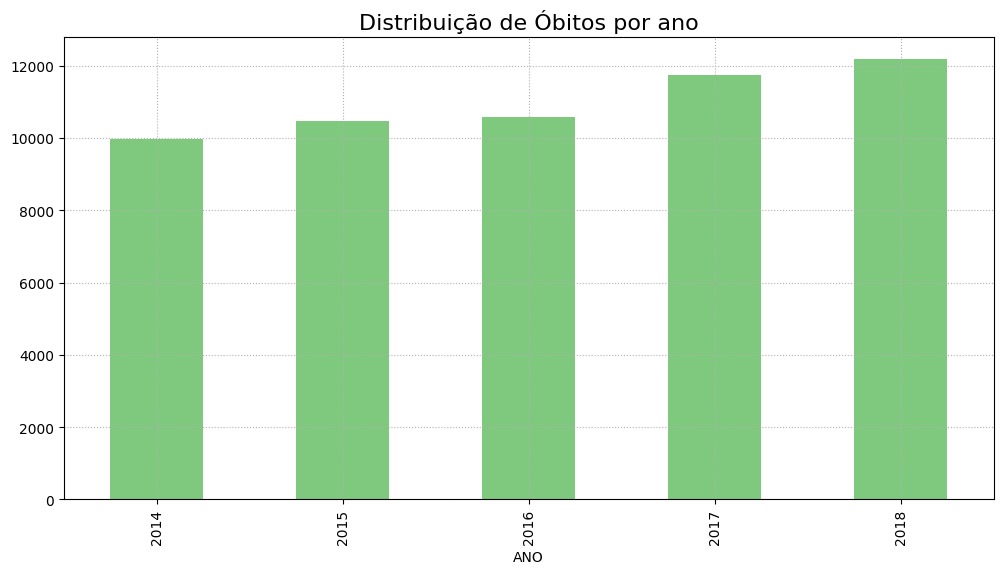

In [107]:
sns.set_palette('Accent')
plt.figure(figsize=(12, 6))
bd3['ANO'].value_counts().sort_index().plot.bar()

plt.title('Distribuição de Óbitos por ano', fontsize=16)
plt.grid(linestyle=':')

plt.show()

In [108]:
# mapear os números dos meses para os seus respectivos nomes
meses_dict = {
    1: 'janeiro', 2: 'fevereiro', 3: 'março', 4: 'abril', 5: 'maio', 6: 'junho',
    7: 'julho', 8: 'agosto', 9: 'setembro', 10: 'outubro', 11: 'novembro', 12: 'dezembro'
}

bd3['MES'] = bd3['MES'].map(meses_dict)

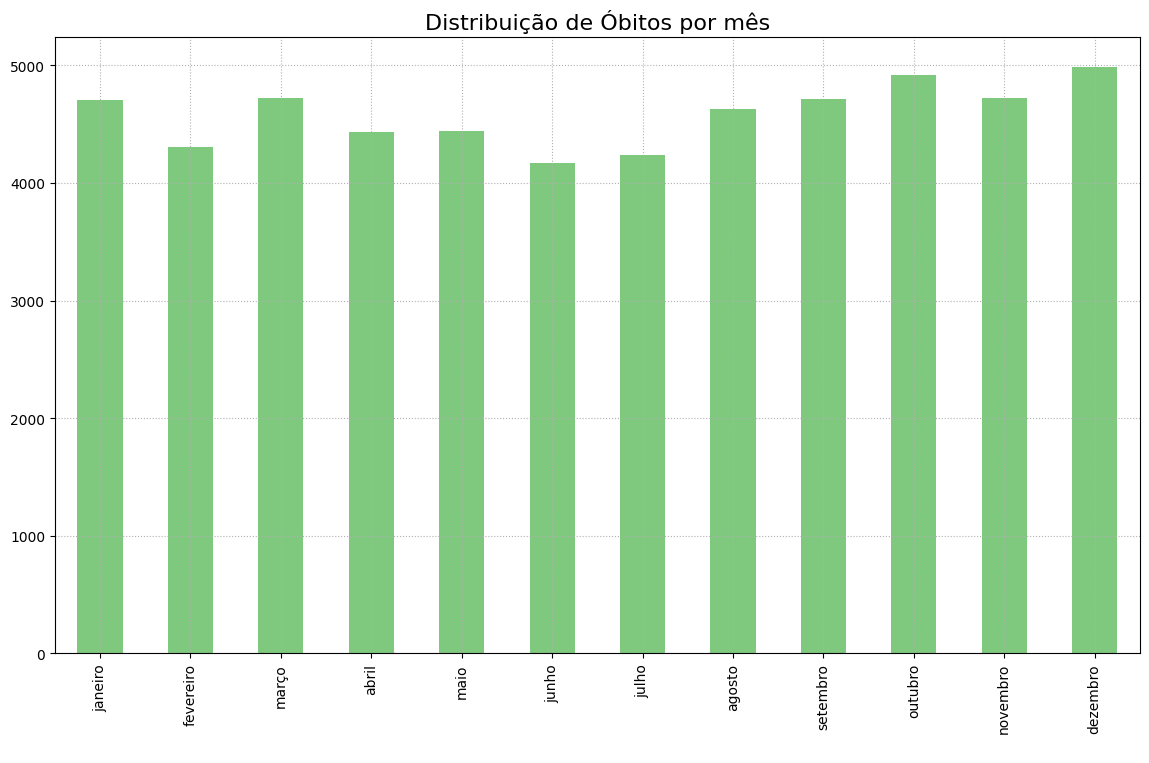

In [109]:
# ordernar a aparição de cada mês para melhor compreensão
ordem_meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

bd3['MES'] = pd.Categorical(bd3['MES'], categories=ordem_meses, ordered=True)

sns.set_palette('Accent')
plt.figure(figsize=(14, 8))
bd3['MES'].value_counts().sort_index().plot.bar()

plt.title('Distribuição de Óbitos por mês', fontsize=16)
plt.grid(linestyle=':')
plt.xlabel(' ')

plt.show()

##### Temos uma queda no numero de óbitos nos meses mais frios

<Figure size 2000x1000 with 0 Axes>

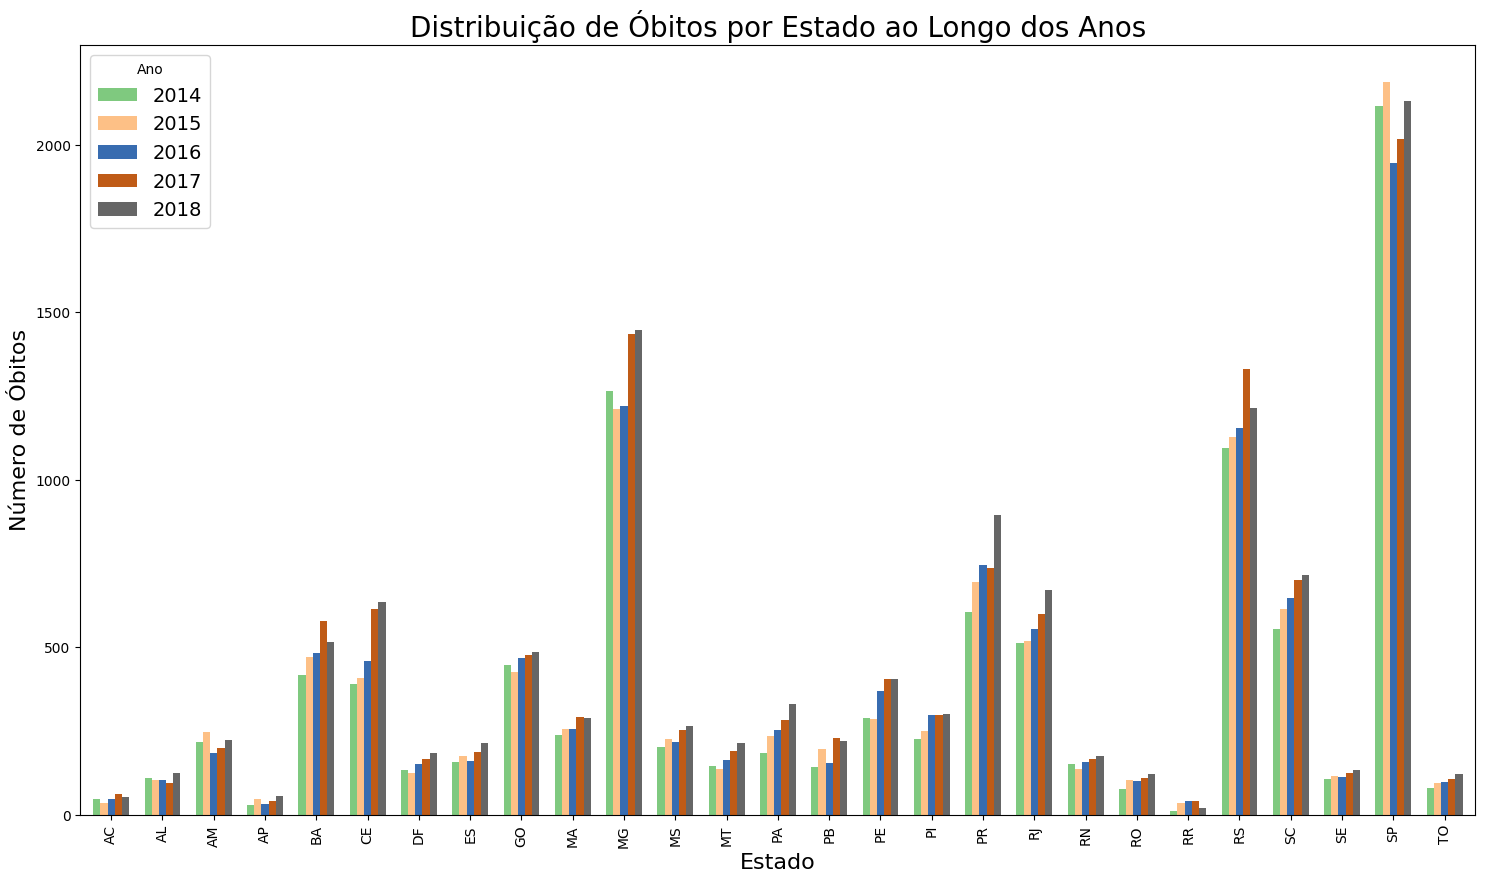

In [110]:
estado_ano = bd3.groupby(['ESTADO', 'ANO']).size().unstack()

plt.figure(figsize=(20, 10))
estado_ano.plot(kind='bar', figsize=(18, 10), cmap='Accent', width=0.7)

plt.title('Distribuição de Óbitos por Estado ao Longo dos Anos', fontsize=20)
plt.ylabel('Número de Óbitos', fontsize=16)
plt.xlabel('Estado', fontsize=16)
plt.legend(title='Ano', fontsize=14)

plt.show()

##### SP teve uma queda em seus números no ano de 2016, RS teve um aumento no ano de 2017, PR teve um aumento no ano de 2017 e MG teve um aumento nos anos de 2017 e 2018.

<Figure size 2000x1000 with 0 Axes>

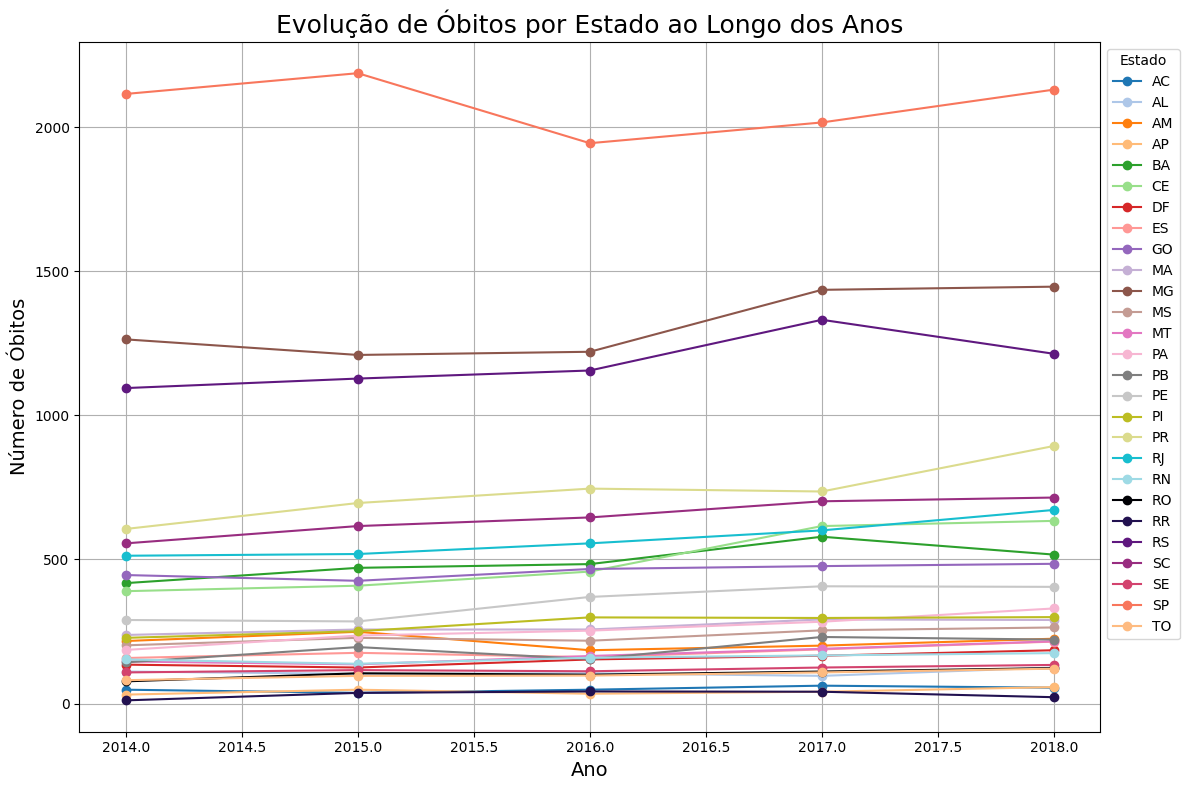

In [111]:
tab20_colors = plt.cm.tab20(np.linspace(0, 1, 20))  
accent_colors = plt.cm.magma(np.linspace(0, 1, 8)) 
combined_colors = np.vstack((tab20_colors, accent_colors))

plt.figure(figsize=(20, 10))
estado_ano.T.plot(kind='line', figsize=(12, 8), marker='o', color=combined_colors)

plt.title('Evolução de Óbitos por Estado ao Longo dos Anos', fontsize=18)
plt.ylabel('Número de Óbitos', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.legend(title='Estado', bbox_to_anchor=(1,1))
plt.grid(linestyle='-')
plt.tight_layout()
plt.show()

________________________________________________________________________________________________________________________________________________

### Tem o sexo tem relação no número de Óbitos?

##### A maioria da base e Masculina

Text(0.5, 1.0, 'Diferença por sexo')

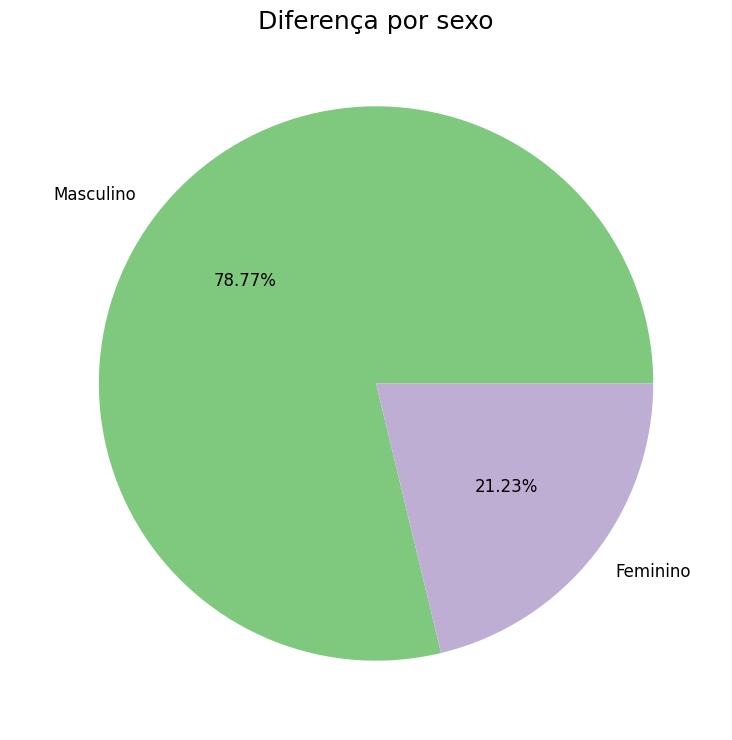

In [112]:
bd3['SEXO'].value_counts().plot.pie(autopct='%0.2f%%', fontsize=12, figsize=(9, 9))
plt.ylabel(' ')

plt.title('Diferença por sexo', fontsize=18)

##### Essa variação entre homens e mulheres estaria relacionada a menor dependência de álcool, maior religiosidade e percepção mais precoce de sinais de risco para depressão e doença mental.

   

In [113]:
masculino = bd3[bd3['SEXO'] == 'Masculino'].shape[0]
feminino = bd3[bd3['SEXO'] == 'Feminino'].shape[0]

total_obitos = masculino + feminino

percentual_masculino = (masculino / total_obitos) * 100
percentual_feminino = (feminino / total_obitos) * 100

diferenca_percentual = percentual_masculino - percentual_feminino

print(f'O percentual Masculino e {diferenca_percentual:.2f}% maior que o feminino')

O percentual Masculino e 57.53% maior que o feminino


##### O percentual Masculino e 57.53% maior que o feminino

C:\Users\Vitor\AppData\Local\Temp\ipykernel_14080\3992559732.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_sexo = bd3.groupby(['faixa_etaria', 'SEXO']).size().unstack(fill_value=0)


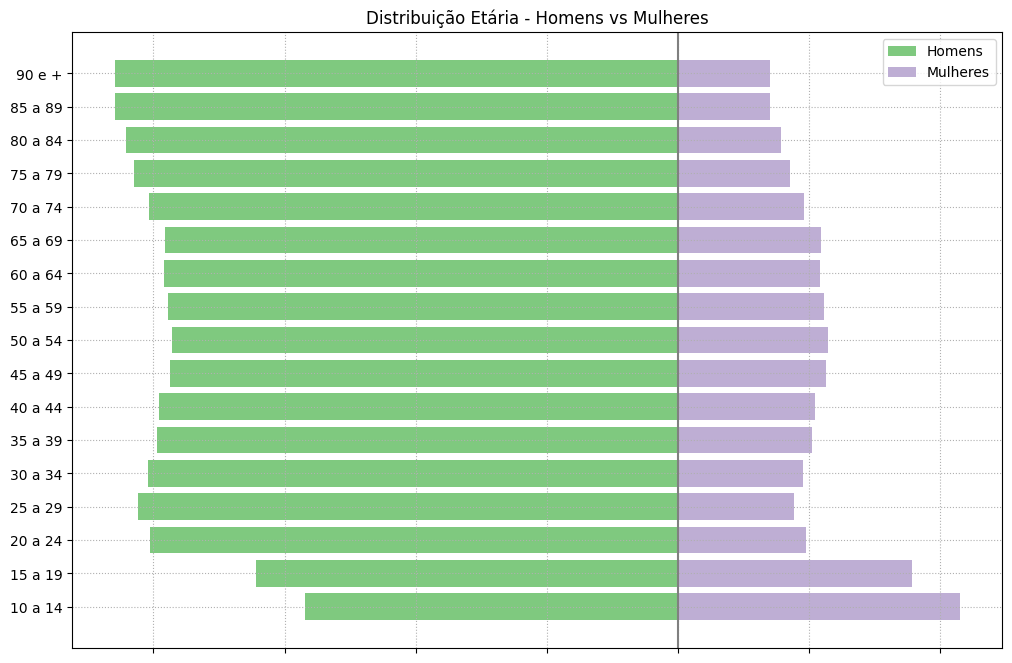

In [114]:
# faixa etária a faixa_etaria
bins = [0, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 100]  
labels = ['10 a 14', '15 a 19', '20 a 24', '25 a 29', '30 a 34', '35 a 39', '40 a 44', 
          '45 a 49', '50 a 54', '55 a 59', '60 a 64', '65 a 69', '70 a 74', '75 a 79', 
          '80 a 84', '85 a 89', '90 e +'] 

bd3['faixa_etaria'] = pd.cut(bd3['IDADE'], bins=bins, labels=labels, right=False)

# Agrupando por faixa etária e sexo, e contando as ocorrências
faixa_sexo = bd3.groupby(['faixa_etaria', 'SEXO']).size().unstack(fill_value=0)

# Normalizando os valores por faixa etária para obter percentuais
faixa_sexo_percent = faixa_sexo.divide(faixa_sexo.sum(axis=1), axis=0) * 100

# Configurando o gráfico
plt.figure(figsize=(12, 8))

# Plotando as barras horizontais para os dois sexos
plt.barh(faixa_sexo_percent.index, -faixa_sexo_percent['Masculino'] ,  label='Homens')
plt.barh(faixa_sexo_percent.index, faixa_sexo_percent['Feminino'], label='Mulheres')  # Usando negativo para inverter

# Ajustes do gráfico
plt.title('Distribuição Etária - Homens vs Mulheres')
plt.axvline(0, color='gray')  
plt.legend()
plt.grid(True, linestyle=':')
plt.tick_params(labelbottom=False)

# Exibindo o gráfico
plt.show()


##### As mulheres tendem a cometer suicídio até os 19 anos, ao contrário dos homens, que cometem suicídio após essa idade.

<Figure size 1400x1400 with 0 Axes>

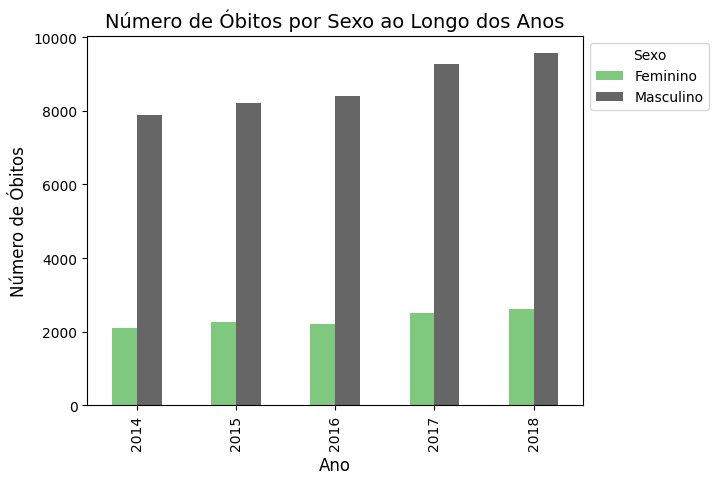

In [115]:
sexo_ano = bd3.groupby(['ANO', 'SEXO']).size().unstack()

plt.figure(figsize=(14, 14))
sexo_ano.plot(kind='bar', cmap='Accent')

plt.title('Número de Óbitos por Sexo ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)

plt.legend(title='Sexo', bbox_to_anchor=(1,1))
plt.show()

##### Os homens aumentaram o número de óbitos nesses anos.

________________________________________________________________________________________________________________________________________________

## Como a idade dos falecidos varia entre os estados ou ao longo dos anos?

##### Temos pessoas com até 113 anos na base.

In [116]:
# o campo "max", mostra o valor maximo encontrado
bd3['IDADE'].describe()

count    54970.000000
mean        42.584883
std         17.362850
min          0.000000
25%         29.000000
50%         41.000000
75%         55.000000
max        113.000000
Name: IDADE, dtype: float64

##### Foi criada uma nova coluna com a idade categorizada como `jovem`, `adulto` e `idoso`, para proporcionar mais opções para a análise de forma mais clara.

In [117]:
def classificarIdade(idade):
    # registros com idade menor ou igual a 24 anos são consideradas jovens
    if idade <= 24:
        return 'Jovem'
    # registros com idade entre 25 e 59 anos são consideradas adultas
    elif 24 < idade <= 59:
        return 'Adulto'
     # registros com idade maior de 59 anos são consideradas idosas
    else:
        return 'Idoso'
    
bd3['CATEGORIA_IDADE'] = bd3['IDADE'].apply(classificarIdade)

In [118]:
bd3.head(3)

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES,faixa_etaria,CATEGORIA_IDADE
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,janeiro,35 a 39,Adulto
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,janeiro,45 a 49,Adulto
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,janeiro,70 a 74,Idoso


##### A maior parte dos dados são de adultos.

Text(0.5, 1.0, 'Diferença por sexo')

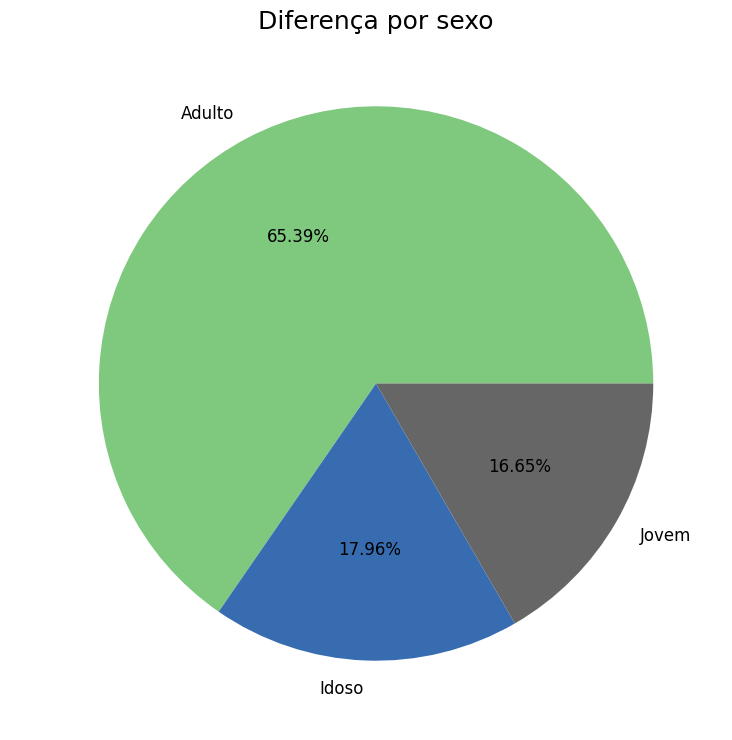

In [119]:
bd3['CATEGORIA_IDADE'].value_counts().plot.pie(autopct='%0.2f%%',fontsize=12,  figsize=(9, 9), cmap='Accent')

plt.ylabel(' ')

plt.title('Diferença por sexo', fontsize=18)

##### A maioria das pessoas que cometem suicídio tem entre 20 e 40 anos.

<Axes: >

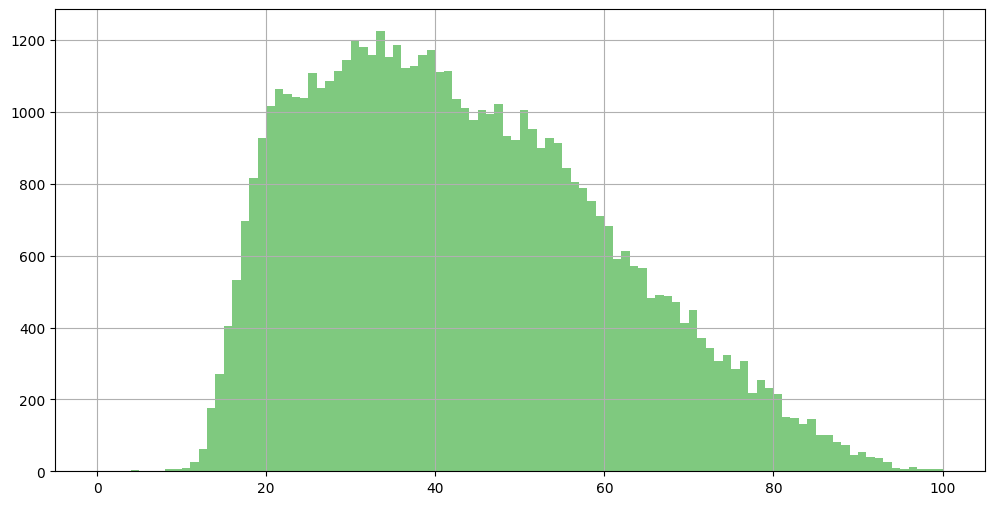

In [120]:
plt.figure(figsize=(12, 6))
bd3['IDADE'].hist(density=False, bins=100, range=[0,100])

<Axes: ylabel='IDADE'>

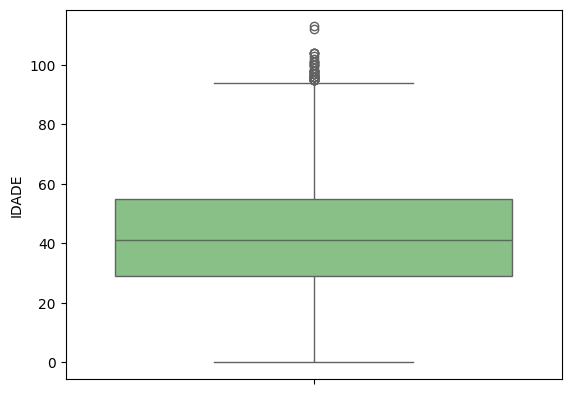

In [121]:
sns.boxplot(y='IDADE', data=bd3)

##### A média da idade é de 40 anos, porém, temos alguns indivíduos com idades acima de 90 anos.

##### Vendo o comportamento das idades por estado

In [122]:
idadeEstado = bd3.groupby('ESTADO')['IDADE']

media = round(idadeEstado.mean(), 2)
mediana = idadeEstado.median()
minimo = idadeEstado.min()
maximo = idadeEstado.max()

resultados = pd.concat([media, mediana, minimo, maximo], axis=1)
resultados.columns = ['Média', 'Mediana', 'Mínimo', 'Máximo']

print(resultados)

        Média  Mediana  Mínimo  Máximo
ESTADO                                
AC      32.83     30.0      13      91
AL      38.82     36.0       0      88
AM      31.73     28.0       9      90
AP      31.82     28.0      12      86
BA      43.04     41.0      10     104
CE      42.35     40.0       7      96
DF      39.05     37.0      13     100
ES      43.28     42.0       4      84
GO      41.57     39.0       4      96
MA      39.36     35.0      11     102
MG      43.17     42.0       7     100
MS      36.88     34.0       8     101
MT      40.58     38.0      12      98
PA      35.87     32.0       4     104
PB      43.68     42.0      13      92
PE      42.87     41.0       2     112
PI      41.94     38.0      11      95
PR      43.06     42.0      11      95
RJ      44.34     43.0      10      97
RN      43.57     42.0       3      98
RO      38.29     35.0       6      83
RR      30.10     25.0      12      96
RS      48.42     49.0       8     104
SC      45.58     46.0   

##### RS tem uma população mais idosa, com uma média de 48,42 anos, enquanto a média de idade de SP é de 41,97 anos.

#### Analisando o comportamento das idades por ano

In [123]:
idadeANO = bd3.groupby('ANO')['IDADE']

media = idadeANO.mean()
mediana = idadeANO.median()
minimo = idadeANO.min()
maximo = idadeANO.max()

resultados = pd.concat([media, mediana, minimo, maximo], axis=1)
resultados.columns = ['Média', 'Mediana', 'Mínimo', 'Máximo']

print(resultados)


          Média  Mediana  Mínimo  Máximo
ANO                                     
2014  42.007725     40.0       3     101
2015  42.773994     41.0       4     113
2016  42.822774     41.0       0     101
2017  42.660628     41.0       5     112
2018  42.614475     41.0       2     103


##### Media de idades parecidas todos os anos.

#### Registros por idade categorizada.

In [124]:
FaixaEstado = bd3.groupby(['ESTADO', 'CATEGORIA_IDADE']).size().unstack()
print("Distribuição de faixa de idade por estado:")
print(FaixaEstado)

Distribuição de faixa de idade por estado:
CATEGORIA_IDADE  Adulto  Idoso  Jovem
ESTADO                               
AC                  148     16     86
AL                  338     73    129
AM                  598     66    413
AP                  113     14     84
BA                 1638    466    365
CE                 1634    437    436
DF                  509     90    165
ES                  670    136     92
GO                 1475    397    429
MA                  832    207    295
MG                 4642   1065    871
MS                  669    144    353
MT                  547    132    174
PA                  734    153    402
PB                  608    187    151
PE                 1116    336    305
PI                  860    268    247
PR                 2443    655    580
RJ                 1874    601    386
RN                  500    159    133
RO                  314     67    135
RR                   68     10     75
RS                 3560   1702    663
SC     

In [125]:
idadeANO = bd3.groupby(['ANO', 'CATEGORIA_IDADE']).size().unstack()
print("Distribuição de faixa de idade por ano:")
print(idadeANO)

Distribuição de faixa de idade por ano:
CATEGORIA_IDADE  Adulto  Idoso  Jovem
ANO                                  
2014               6699   1644   1624
2015               6886   1901   1695
2016               6960   1930   1701
2017               7622   2142   1993
2018               7778   2253   2142


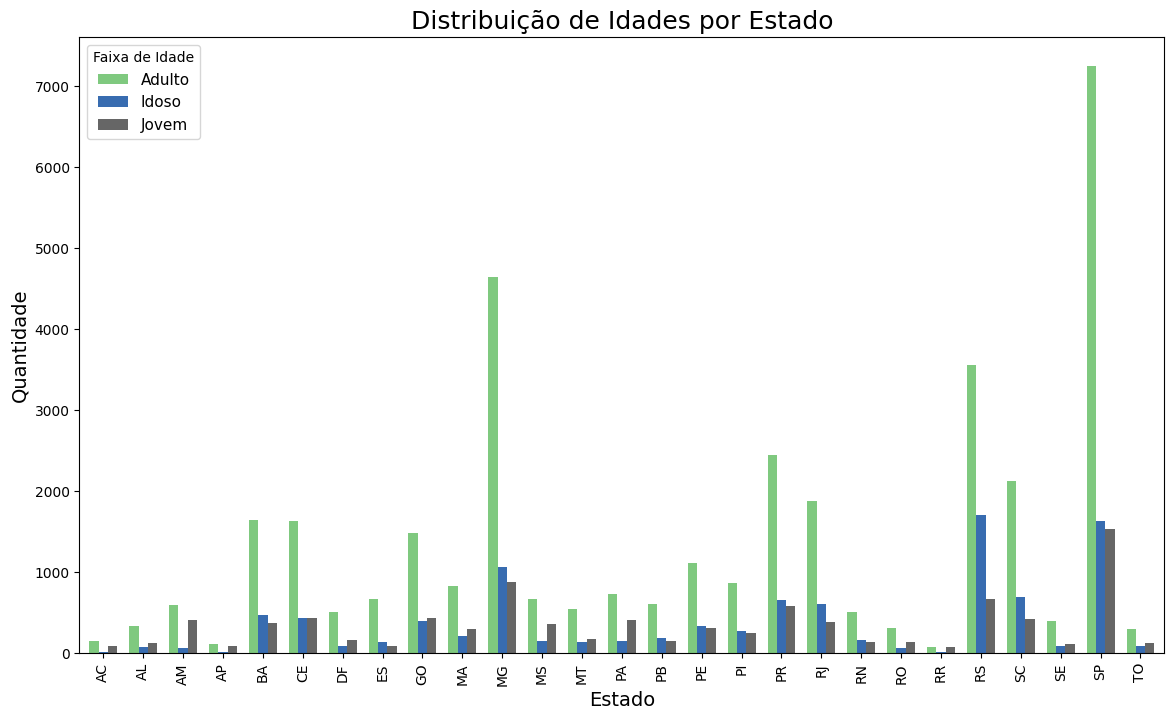

In [126]:
FaixaEstado.plot(kind='bar', figsize=(14, 8), cmap='Accent', width=0.7)
plt.title("Distribuição de Idades por Estado",fontsize=18)
plt.ylabel("Quantidade" , fontsize=14)
plt.xlabel("Estado", fontsize=14)
plt.legend(title='Faixa de Idade', fontsize=11)

plt.show()

##### A população adulta predomina em todos os estados, com uma presença variável de idosos e jovens dependendo da região, como `AM` onde há um aumento significativo na faixa de idade do `Jovem`.

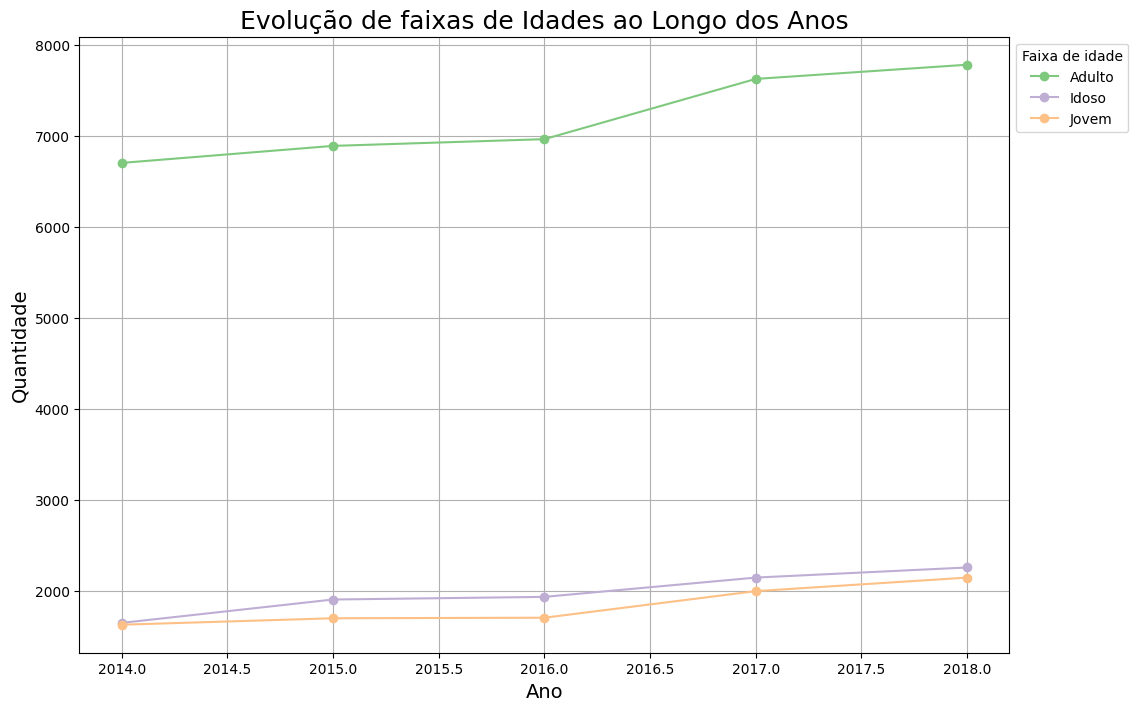

In [127]:
idadeANO.plot(kind='line', figsize=(12, 8), marker='o')
plt.title("Evolução de faixas de Idades ao Longo dos Anos", fontsize=18)
plt.ylabel("Quantidade", fontsize=14)
plt.xlabel("Ano", fontsize=14)
plt.legend(title='Faixa de idade', bbox_to_anchor=(1,1))

plt.grid(linestyle='-')
plt.show()

##### No período de 2016 a 2017, tivemos um aumento mais significativo no número de adultos.

________________________________________________________________________________________________________________________________________________

### Qual é o local mais comum para óbitos?

In [128]:
bd3['LOCOCOR'].value_counts()

LOCOCOR
Domicílio                         34347
Outros                             8678
Hospital                           7830
Via pública                        3249
Outro estabelecimento de saúde      866
Name: count, dtype: int64

##### A maior parte das pessoas veio a óbito em seu domicílio.

Text(0.5, 1.0, 'local mais comum para óbitos')

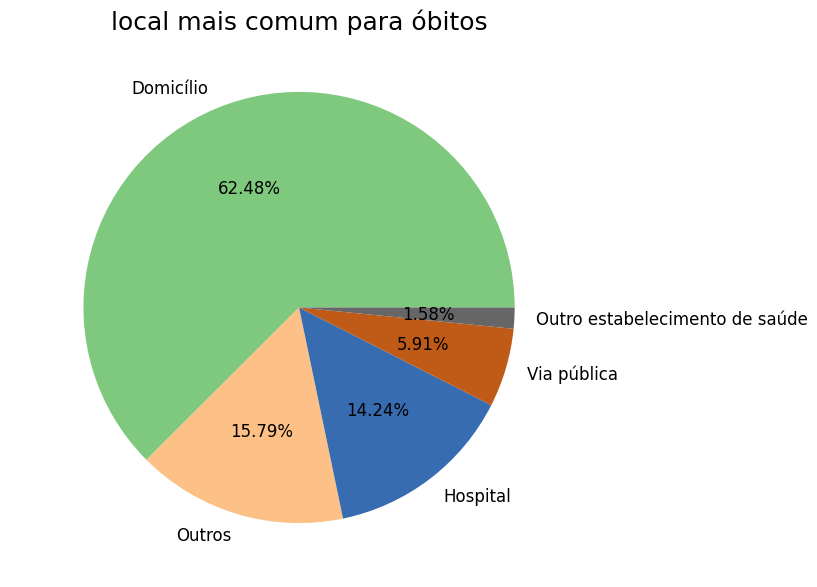

In [129]:
bd3['LOCOCOR'].value_counts().plot.pie(autopct='%0.2f%%',fontsize=12,  figsize=(7, 7), cmap='Accent')

plt.ylabel(' ')

plt.title('local mais comum para óbitos', fontsize=18)

##### Mais de 62% das pessoas vieram a óbito em seu domicílio.

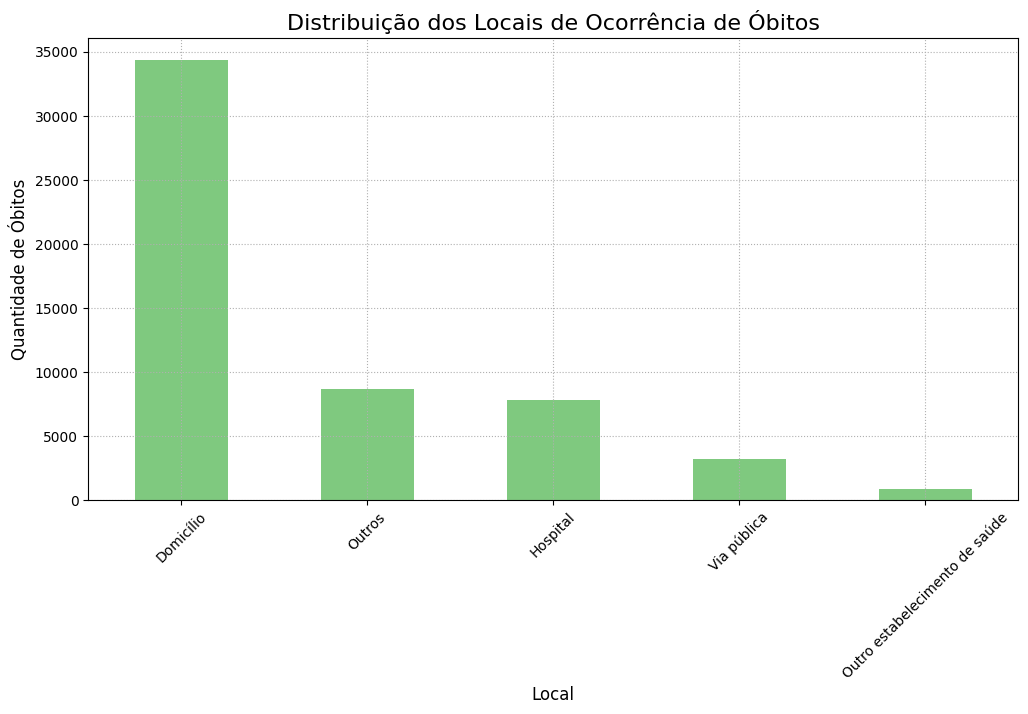

In [130]:
bd3['LOCOCOR'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição dos Locais de Ocorrência de Óbitos', fontsize=16)
plt.xlabel('Local', fontsize=12)
plt.ylabel('Quantidade de Óbitos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle=':')

plt.show()


________________________________________________________________________________________________________________________________________________

### Qual é a relação entre os óbitos e a ocupação que a pessoa exerce?

Para facilitar a análise, foi decidido categorizar as profissões em classes, da seguinte forma:

- **Desempregados/Inativos**
- **Agropecuária**
- **Construção Civil**
- **Serviços Domésticos**
- **Comércio**
- **Transporte**
- **Segurança**
- **Direito/Administração**
- **Indústria**
- **Alimentação**
- **Saúde**
- **Educação**
- **Outros**

A categoria **'PoucasPessoas'** engloba as profissões com menos de 10 registros, que foram agrupadas.

In [131]:
# contagem_OCUP_dict é um dicionário com todas as ocupações da base de dados.
contagem_OCUP_dict = bd3['OCUP'].value_counts().to_dict()

In [132]:
# profissões com 10 ou mais registros, para ser categorizadas 
contagem_OCUP_dict

dicionario = {}

for emprego, pessoas in contagem_OCUP_dict.items():
    if pessoas >= 10:
        dicionario[emprego] = pessoas
    pass

# print(dicionario)

In [133]:
# lita com as profissões de 9 ou menos registros para se agrupados
lista = []
for emprego, pessoas in contagem_OCUP_dict.items():
    if pessoas <= 9:
        lista.append(emprego) 
    pass

##### Categorizar as profissões:

In [134]:
from collections import defaultdict

# dicionario com os dados das profissões com suas respectivas quantidades
contagem_OCUP_dict

# Categorias das ocupações
categorias = {
    "Desempregados/Inativos": ["DESEMPREGADO","APOSENTADO/PENSIONISTA", "ESTUDANTE", "DONA DE CASA", "IGNORADA", "DESEMPREGADO CRONICO "],

    "Agropecuaria": ["TRABALHADOR AGROPECUARIO EM GERAL", "TRABALHADOR VOLANTE DA AGRICULTURA", 
                    "PRODUTOR AGRICOLA POLIVALENTE", "CASEIRO (AGRICULTURA)", "PRODUTOR AGROPECUARIO, EM GERAL", "JARDINEIRO",
                    "TRATORISTA AGRICOLA", "TRABALHADOR DA CULTURA DE FUMO", "TRABALHADOR DO BENEFICIAMENTO DE FUMO","ENGENHEIRO AGRONOMO",
                    "OPERADOR DE MAQUINAS DE BENEFICIAMENTO  AGRICOLAS","TRABALHADOR NA OLERICULTURA (LEGUMES)",
                    "TRABALHADOR DA CULTURA DE ARROZ","TRABALHADOR DE PECUARIA POLIVALENTE","TECNICO AGRICOLA",
                    "TRABALHADOR DA PECUARIA (BOVINOS LEITE)","TRABALHADOR DA PECUARIA (BOVINOS CORTE)",
                    'TRABALHADOR DA CULTURA DE CANA-DE-ACUCAR',"GARIMPEIRO","CRIADOR EM PECUARIA POLIVALENTE","MAGAREFE"],

    "Construção Civil": ["PEDREIRO", "SERVENTE DE OBRAS" , "PINTOR DE OBRAS", "ELETRICISTA DE INSTALACOES", "CARPINTEIRO", "MARCENEIRO", 
                         "SOLDADOR", "SERRALHEIRO", "ENGENHEIRO CIVIL", "PINTOR A PINCEL E ROLO (EXCETO OBRAS E ESTRUTURAS METALICAS)",
                         "AUXILIAR GERAL DE CONSERVACAO DE VIAS PERMANENTES ", "GESSEIRO", "VIDRACEIRO", 
                         "TRABALHADOR DE SERVICOS DE MANUTENCAO DE EDIFICIOS", "MESTRE (CONSTRUCAO CIVIL)", "TECNICO ELETRICISTA",
                         "TRABALHADOR DA MANUTENCAO DE EDIFICACOES","ARQUITETO DE EDIFICACOES","PEDREIRO DE EDIFICACOES","ELETROTECNICO",
                         "ARMADOR DE ESTRUTURA DE CONCRETO","MONTADOR DE ESTRUTURAS METALICAS","ELETRICISTA DE INSTALACOES (EDIFICIOS)",
                         "MARMORISTA (CONSTRUCAO)","ENGENHEIRO ELETRICISTA","MONTADOR DE ANDAIMES (EDIFICACOES)",
                         "ARMADOR DE ESTRUTURA DE CONCRETO ARMADO","TECNICO MECANICO (CALEFACAO, VENTILACAO E REFRIGERACAO)",
                         "MECANICO DE REFRIGERACAO"],

    "Serviços Domésticos": ["EMPREGADO DOMESTICO NOS SERVICOS GERAIS", "EMPREGADO DOMESTICO DIARISTA", "EMPREGADO DOMESTICO ARRUMADOR",
                            "MONTADOR DE MOVEIS E ARTEFATOS DE MADEIRA", "ENCANADOR", "EMPREGADO DOMESTICO FAXINEIRO",
                            "ELETRICISTA DE MANUTENCAO ELETROELETRONICA","COZINHEIRO DO SERVICO DOMESTICO","ESTETICISTA"],

    "Comércio": ["REPRESENTANTE COMERCIAL AUTONOMO", "COMERCIANTE VAREJISTA" , "VENDEDOR DE COMERCIO VAREJISTA", "VENDEDOR AMBULANTE",
                 "COMERCIANTE ATACADISTA", "EMPRESARIO DE ESPETACULO", "OPERADOR DE CAIXA", "REPOSITOR DE MERCADORIAS",
                 "DIRETOR GERAL DE EMPRESA E ORGANIZACOES ", "CORRETOR DE IMOVEIS", "COSTUREIRA DE PECAS SOB ENCOMENDA", "MANICURE",
                 "OPERADOR DE TELEMARKETING ATIVO E RECEPTIVO","VENDEDOR EM COMERCIO ATACADISTA", "FEIRANTE", "ALMOXARIFE", 
                 "LAVADOR DE VEICULOS", "GERENTE COMERCIAL", "AGENTE PUBLICITARIO","PROMOTOR DE VENDAS",
                 "ATENDENTE COMERCIAL (AGENCIA POSTAL)","SAPATEIRO (CALCADOS SOB MEDIDA)","VENDEDOR EM DOMICILIO","ESCRITURARIO DE BANCO",
                 "OPERADOR DE TELEMARKETING ATIVO","COPEIRO","BARMAN","TELEFONISTA","TECNICO DE TELECOMUNICACOES (TELEFONIA)",
                 "AJUDANTE DE DESPACHANTE ADUANEIRO","CAIXA DE BANCO","ATENDENTE DE AGENCIA","CHAVEIRO","VENDEDOR PRACISTA"],

    "Transporte": ["MOTORISTA DE CARRO DE PASSEIO" , "MOTORISTA DE CAMINHAO (ROTAS REGIONAIS E INTERNACIONAIS)",
                   "MECANICO DE MANUTENCAO DE AUTOMOVEIS E MOTOCICLETAS ", "MOTORISTA DE TAXI", "AJUDANTE DE MOTORISTA" , 
                   "MOTORISTA DE ONIBUS URBANO", "MOTOCICLISTA NO TRANSPORTE DE DOCUMENTOS E PEQUENOS VOLUMES", 
                   "MOTORISTA DE FURGAO OU VEICULO SIMILAR", "AJUSTADOR MECANICO", "CAMINHONEIRO AUTONOMO (ROTAS REGIONAIS E INTERNACIONAIS)",
                   "BORRACHEIRO","FUNILEIRO DE VEICULOS (REPARACAO)", "COBRADOR DE TRANSPORTES COLETIVOS (EXCETO TREM)",
                   "MOTORISTA DE ONIBUS RODOVIARIO","CONFERENTE DE CARGA E DESCARGA","ESTIVADOR", "PINTOR DE VEICULOS (REPARACAO)"
                   ,"INSTRUTOR DE AUTO-ESCOLA","CARREGADOR (VEICULOS DE TRANSPORTES TERRESTRES)","MOTORNEIRO",
                   "ELETRICISTA DE INSTALACOES (VEICULOS AUTOMOTORES )","MECANICO DE VEICULOS AUTOMOTORES A DIESEL (EXCETO TRATORES)",
                   "MANOBRADOR","COBRADOR INTERNO"],

    "Seguranca": ["VIGILANTE", "SOLDADO DA POLICIA MILITAR", "AGENTE DE SEGURANCA", "VIGIA", "CABO DA POLICIA MILITAR",
                  "INVESTIGADOR DE POLICIA", "GUARDA-CIVIL MUNICIPAL", "AGENTE DE SEGURANCA PENITENCIARIA","POLICIAL RODOVIARIO FEDERAL",
                  "SARGENTO DA POLICIA MILITAR","DELEGADO DE POLICIA","PRACA DO EXERCITO","TECNICO EM SEGURANCA NO TRABALHO",
                  "OFICIAL DE JUSTICA","SOLDADO BOMBEIRO MILITAR","OFICIAL DO EXERCITO","AGENTE DE POLICIA FEDERAL"],

    "Direito_administracao": ["ADVOGADO", "ASSISTENTE ADMINISTRATIVO" , "ADMINISTRADOR", "DIRIGENTE DO SERVICO PUBLICO MUNICIPAL", "CONTADOR", 
                "DIRIGENTE DO SERVICO PUBLICO ESTADUAL E DISTRITAL", "DIRIGENTE DO SERVICO PUBLICO FEDERAL", "GERENTE ADMINISTRATIVO",
                "SECRETARIA EXECUTIVA","ANALISTA DE PRODUTOS BANCARIOS","ECONOMISTA","TECNICO EM SECRETARIADO","TECNICO DE CONTABILIDADE",
                "ASSISTENTE SOCIAL","CORRETOR DE SEGUROS","ANALISTA FINANCEIRO (INSTITUICOES FINANCEIRAS)","SECRETARIO - EXECUTIVO",
                "CONFERENTE DE SERVICOS BANCARIOS","GERENTE DE VENDAS","GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO)",
                "AUXILIAR DE CONTABILIDADE","SUPERVISOR ADMINISTRATIVO","TECNICO DE OPERACOES E SERVICOS BANCARIOS - CREDITO IMOBILIARIO",
                "DESPACHANTE DOCUMENTALISTA"],

    "Industria": ["ALIMENTADOR DE LINHA DE PRODUCAO", "OPERADOR DE MAQUINAS FIXAS, EM GERAL", "MECANICO DE MANUTENCAO DE MAQUINAS, EM GERAL",
                  "MARCADOR DE PRODUTOS (SIDERURGICO E METALURGICO)", "COSTUREIRO NA CONFECCAO EM SERIE","APONTADOR DE PRODUCAO",
                  "ANALISTA DE DESENVOLVIMENTO DE SISTEMAS","TRABALHADOR POLIVALENTE DA CONFECCAO DE CALCADOS",
                  "COSTUREIRA DE REPARACAO DE ROUPAS","EMBALADOR, A MAO","ANALISTA DE SISTEMAS DE AUTOMACAO","OPERADOR DE EMPILHADEIRA",
                  "TECNICO MECANICO","CONTRAMESTRE DE ACABAMENTO (INDUSTRIA TEXTIL)","COSTUREIRO, A MAQUINA NA CONFECCAO EM SERIE",
                  "ARTESAO MODELADOR (VIDROS)","OPERADOR DE MAQUINAS-FERRAMENTA CONVENCIONAIS","MONTADOR DE MAQUINAS",
                  "DESENHISTA INDUSTRIAL (DESIGNER)","TECNICO ELETRONICO", "ENGENHEIRO MECANICO","TECNICO DE MANUTENCAO ELETRONICA"
                  ,"OPERADOR DE MAQUINA DE ABRIR VALAS","CARREGADOR (ARMAZEM)","FERRAMENTEIRO","ESTOFADOR DE MOVEIS"
                  ,"OPERADOR DE MAQUINAS DE CONSTRUCAO CIVIL E MINERACAO","OPERADOR DE CALDEIRA","TOPOGRAFO","ENGENHEIRO QUIMICO",
                  "OPERADOR DE MAQUINAS OPERATRIZES","ACABADOR DE CALCADOS","SERRADOR DE MADEIRA","CALDEIREIRO (CHAPAS DE FERRO E ACO)",
                  "TECNICO EM MANUTENCAO DE MAQUINAS","QUIMICO","PROGRAMADOR DE SISTEMAS DE INFORMACAO",
                  "MONTADOR DE EQUIPAMENTOS ELETRONICOS (MAQUINAS INDUSTRIAIS)",""],

    "Alimentação": ["COZINHEIRO GERAL", "GARCOM", "ACOUGUEIRO", "PADEIRO", "PESCADOR ARTESANAL DE AGUA DOCE", "PESCADOR PROFISSIONAL",
                    "PESCADOR ARTESANAL DE PEIXES E CAMAROES", "ATENDENTE DE LANCHONETE","CONFEITEIRO","CHEFE DE COZINHA",
                    "COZINHADOR (CONSERVACAO DE ALIMENTOS)"],

    "Saúde": ["TECNICO DE ENFERMAGEM", "ENFERMEIRO", "MEDICO CLINICO", "ATENDENTE DE FARMACIA - BALCONISTA", 
              "CIRURGIAO DENTISTA - CLINICO GERAL", "AUXILIAR DE ENFERMAGEM", "PSICOLOGO CLINICO", "AUXILIAR DE PRODUCAO FARMACEUTICA",
              "AGENTE DE SAUDE PUBLICA","TRABALHADOR DA CULTURA DE CAFE","MEDICO VETERINARIO","CUIDADOR DE IDOSOS",
              "FARMACEUTICO","AGENTE COMUNITARIO DE SAUDE","FISIOTERAPEUTA","BIOLOGO","NUTRICIONISTA","TECNICO EM RADIOLOGIA E IMAGENOLOGIA",
              "PROTETICO DENTARIO"],

    "Educacao": ["PROFESSOR DA EDUCACAO DO ENSINO FUNDAMENTAL ", "PROFESSOR DE NIVEL SUPERIOR DO ENSINO FUNDAMENTAL",
                 "PROFESSORES DE CURSOS LIVRES", "PROFESSOR DE NIVEL MEDIO NO ENSINO FUNDAMENTAL","PEDAGOGO",
                 "PROFESSOR DE DISCIPLINAS PEDAGOGICAS NO ENSINO MEDIO","PROFESSOR DE EDUCACAO FISICA DO ENSINO FUNDAMENTAL",
                 "PROFESSOR DE EDUCACAO FISICA NO ENSINO MEDIO"],

    "Outros": ["PORTEIRO DE EDIFICIOS", "FAXINEIRO", "FRENTISTA", "AUXILIAR DE ESCRITORIO, EM GERAL", 
                        "RECEPCIONISTA, EM GERAL","ZELADOR DE EDIFICIO", "GARI", "TECNICO EM MANUTENCAO DE EQUIPAMENTOS DE INFORMATICA", 
                        "CATADOR DE MATERIAL RECICLAVEL", "AUXILIAR DE PESSOAL","ARTISTA (ARTES VISUAIS)","PORTEIRO (HOTEL)","FOTOGRAFO",
                        "MUSICO INTERPRETE CANTOR","BABA","TECNICO DE APOIO AO USUARIO DE INFORMATICA (HELPDESK)","JORNALISTA","CARTEIRO",
                        "CERAMISTA","MUSICO INTERPRETE INSTRUMENTISTA","COLETOR DE LIXO","PORTEIRO DE LOCAIS DE DIVERSAO","AGENTE FUNERARIO",
                        "MUSICO ARRANJADOR","CABELEIREIRO","CHAPEADOR","BARBEIRO","CONTINUO","MINISTRO DE CULTO RELIGIOSO"],

    'poucasPessoas':lista  # passado a lista com profissões de 9 ou menos registros 
}

# Função para categorizar profissões
from collections import defaultdict

def categorizar_contagem_OCUP_dict(contagem_OCUP_dict, categorias):
    """
    Categoriza uma contagem de ocupações em grupos predefinidos.

    Parâmetros:
    ----------
    contagem_OCUP_dict: dicionario
        Um dicionário as chaves são nomes de profissões e os valores e o numero de pessoas nesta profissão.
    categorias: dicionario
        Um dicionário onde as chaves são nomes das categorias e os valores são listas de profissões 

    Retorna:
    -------
    categorias_agrupadas 
        Um dicionário com a soma das contagens de ocupações agrupadas por categoria.
    nao_categorizadas
        Um dicionário contendo as ocupações que não foram agrupadas.
    """
    categorias_agrupadas = defaultdict(int)
    nao_categorizadas = {}

    for profissao, quantidade in contagem_OCUP_dict.items():
        categorizada = False
        for categoria, contagem_OCUP_dict_cat in categorias.items():
            if profissao in contagem_OCUP_dict_cat:
                categorias_agrupadas[categoria] += quantidade
                categorizada = True
                break
        if not categorizada:
            nao_categorizadas[profissao] = quantidade

    return categorias_agrupadas, nao_categorizadas

# Processar os dados
categorias_agrupadas, nao_categorizadas = categorizar_contagem_OCUP_dict(contagem_OCUP_dict, categorias)

# Exibir os resultados
categorias_agrupadas , nao_categorizadas

(defaultdict(int,
             {'Desempregados/Inativos': 24393,
              'Agropecuaria': 7720,
              'Construção Civil': 5183,
              'Serviços Domésticos': 1735,
              'Comércio': 4094,
              'Transporte': 2348,
              'Seguranca': 1229,
              'Direito_administracao': 1264,
              'Industria': 1253,
              'Outros': 1372,
              'Alimentação': 928,
              'Saúde': 986,
              'Educacao': 405,
              'poucasPessoas': 2060}),
 {})

##### Criar nova coluna para preencher com a categoria de trabalho da pessoa

In [135]:
def categorizar_profissao(profissao):
    for categoria, lista_profissoes in categorias.items():
        if profissao in lista_profissoes:
            return categoria  

bd3['CATEGORIA_OCUP'] = bd3['OCUP'].apply(categorizar_profissao)

bd3.head()

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES,faixa_etaria,CATEGORIA_IDADE,CATEGORIA_OCUP
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,janeiro,35 a 39,Adulto,poucasPessoas
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,janeiro,45 a 49,Adulto,poucasPessoas
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,janeiro,70 a 74,Idoso,Desempregados/Inativos
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,fevereiro,15 a 19,Jovem,Desempregados/Inativos
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,fevereiro,40 a 44,Adulto,Desempregados/Inativos


##### A maioria das pessoas que cometem suicídio está desempregada ou inativa. Além disso, os dados mostram que o trabalho na agropecuária também apresenta números bastante elevados.

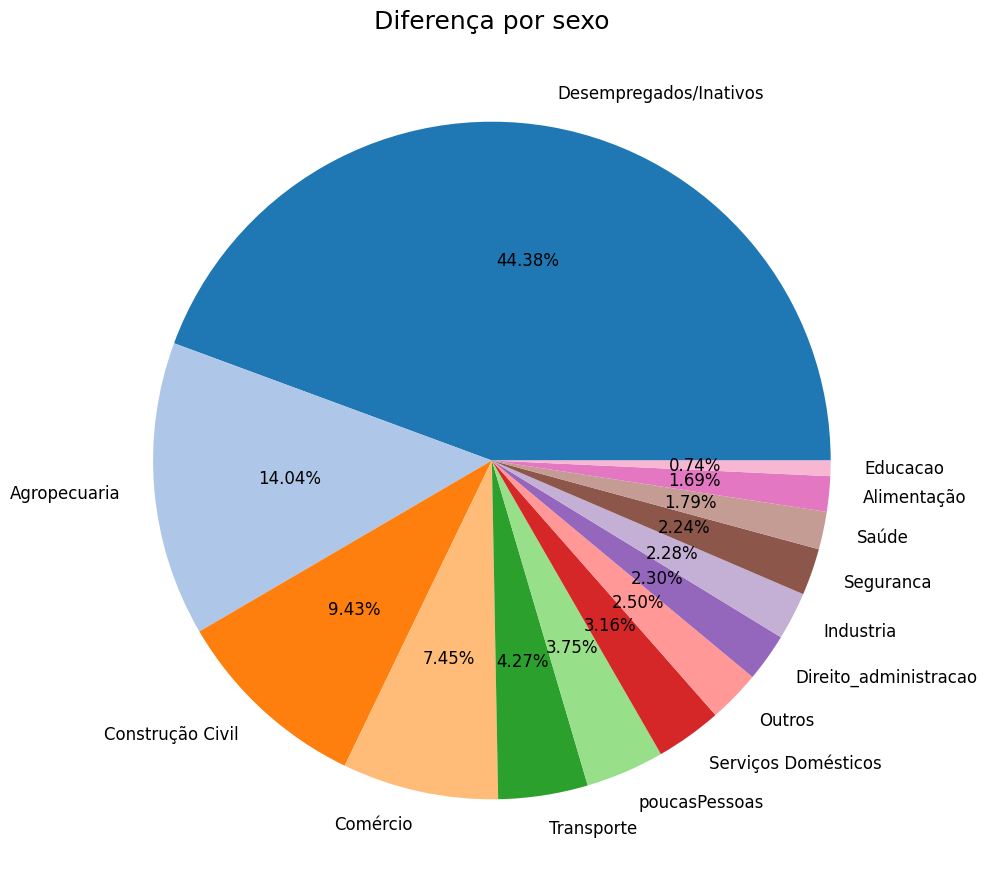

In [136]:
tab20_colors = plt.cm.tab20(np.linspace(0, 1, 20))  
accent_colors = plt.cm.magma(np.linspace(0, 1, 8))  
combined_colors = np.vstack((tab20_colors, accent_colors)) 

category_counts = bd3['CATEGORIA_OCUP'].value_counts()

plt.figure(figsize=(11, 11))
category_counts.plot.pie(autopct='%0.2f%%', fontsize=12, colors=combined_colors)

plt.ylabel('')  
plt.title('Diferença por sexo', fontsize=18)

plt.show()

##### A maioria das categorias apresenta uma leve tendência de aumento ao longo dos anos. A categoria "Desempregados/Inativos" lidera em número de óbitos, com uma leve queda em 2016, seguida de um aumento ainda maior no ano seguinte.

<Figure size 2000x1000 with 0 Axes>

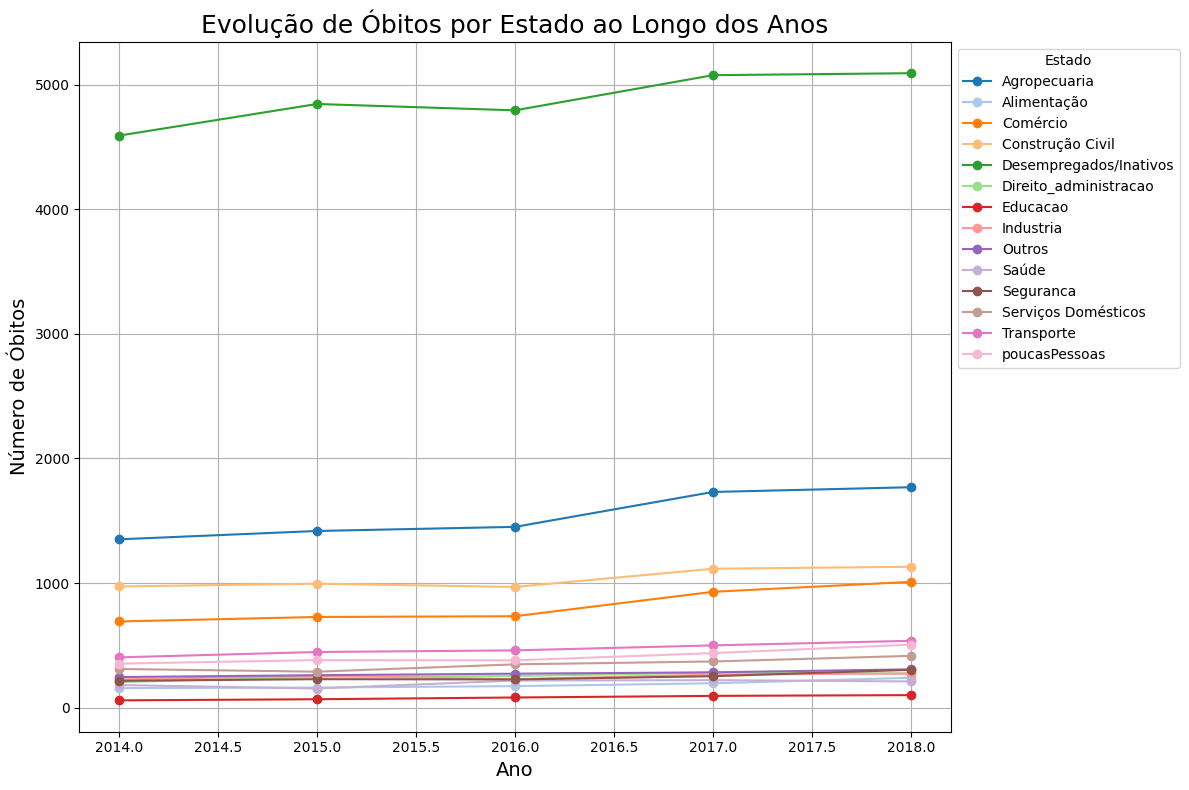

In [137]:
CATEGORIA_OCUP_ano = bd3.groupby(['CATEGORIA_OCUP', 'ANO']).size().unstack()

tab20_colors = plt.cm.tab20(np.linspace(0, 1, 20))  
accent_colors = plt.cm.magma(np.linspace(0, 1, 8)) 
combined_colors = np.vstack((tab20_colors, accent_colors))

plt.figure(figsize=(20, 10))
CATEGORIA_OCUP_ano.T.plot(kind='line', figsize=(12, 8), marker='o', color=combined_colors)

plt.title('Evolução de Óbitos por Estado ao Longo dos Anos', fontsize=18)
plt.ylabel('Número de Óbitos', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.legend(title='Estado', bbox_to_anchor=(1,1))
plt.grid(linestyle='-')
plt.tight_layout()
plt.show()

##### Categorias com alta incidência masculina incluem **Agropecuária** e **Construção Civil**, enquanto, **Saúde** e **Educação** apresenta maior equilíbrio de gênero.

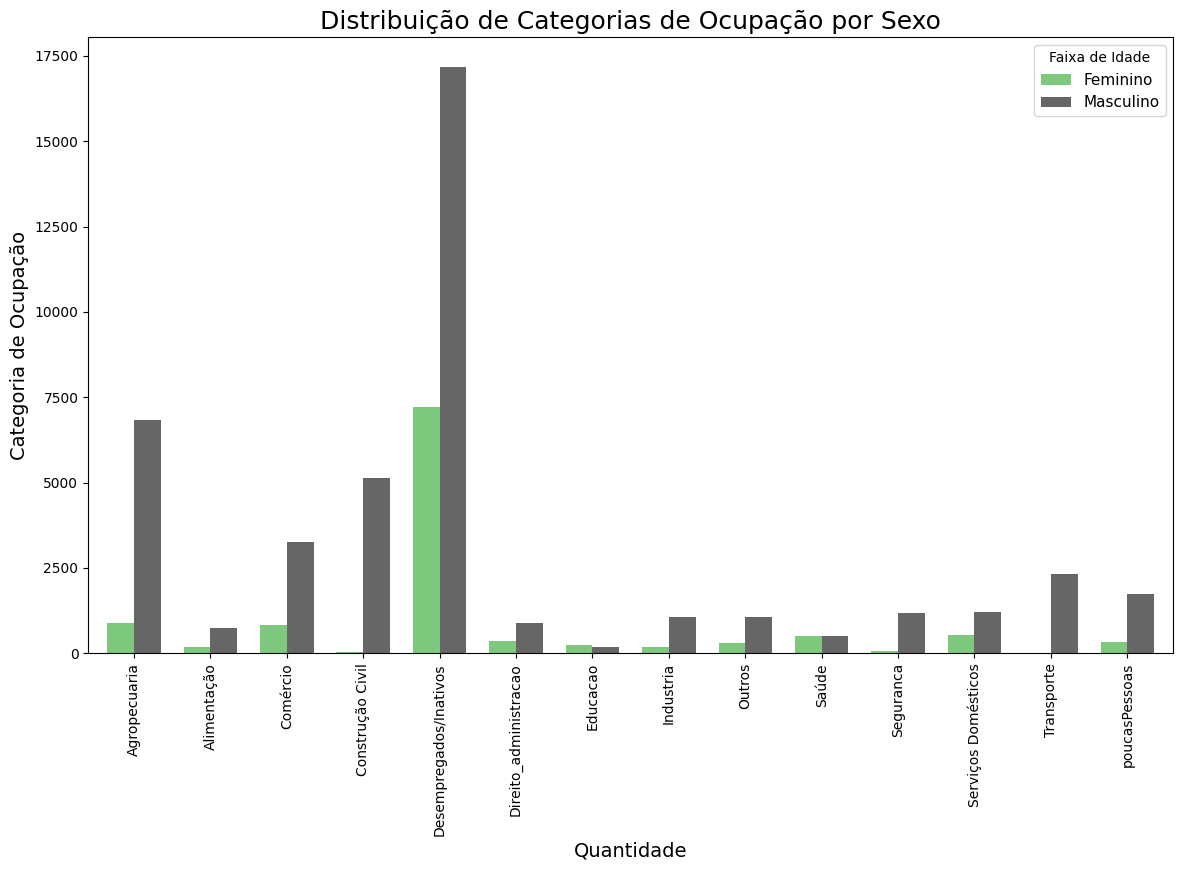

In [138]:
categoria_sexo = pd.crosstab(bd3['CATEGORIA_OCUP'], bd3['SEXO'])

categoria_sexo.plot(kind='bar', figsize=(14, 8), cmap='Accent', width=0.7)
plt.title("Distribuição de Categorias de Ocupação por Sexo",fontsize=18)
plt.ylabel("Categoria de Ocupação" , fontsize=14)
plt.xlabel("Quantidade", fontsize=14)
plt.legend(title='Faixa de Idade', fontsize=11)

plt.show()

##### Ocupações que exigem maior qualificação, como "Saúde", "Direito/administracao" e "Educação", apresentam menos casos.
##### Enquanto isso, ocupações com menor escolaridade, como "Desempregados/Inativos", "Agropecuária" e "Construção Civil", registram um maior número de casos de suicídio.

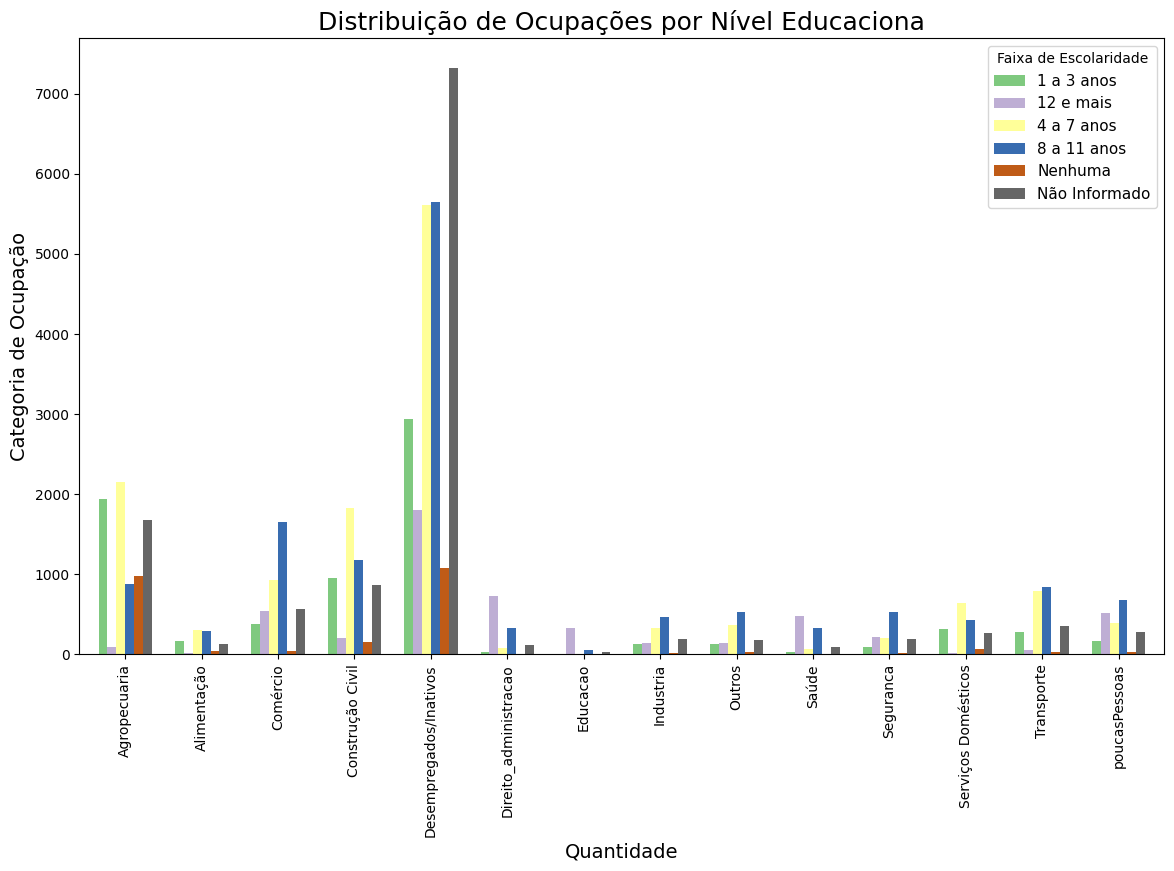

In [139]:
categoria_sexo = pd.crosstab(bd3['CATEGORIA_OCUP'], bd3['ESC'])

categoria_sexo.plot(kind='bar', figsize=(14, 8), cmap='Accent', width=0.7)
plt.title("Distribuição de Ocupações por Nível Educaciona",fontsize=18)
plt.ylabel("Categoria de Ocupação" , fontsize=14)
plt.xlabel("Quantidade", fontsize=14)
plt.legend(title='Faixa de Escolaridade', fontsize=11)

plt.show()


## Conclusão: